<a href="https://colab.research.google.com/github/kmk3593/google_drive/blob/main/hg_chapter7/chapter_7_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7-3. 신경망 모델 훈련
- 케라스 API를 사용해 모델을 훈련하는데 필요한 다양한 도구들을 알아본다.

### 손실곡선

- 패션 MNIST 데이터셋을 적재하고 훈련 세트와 검증 세트로 나눈다.

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


- 모델을 만든다.
  - 사용자 정의함수를 작성함
  - if 구문을 제외하면 7-2의 코드와 동일하다.
  - if 구문의 역할은 model_fn() 함수에 케라스 층을 추가하면 은닉층 뒤어 또 하나의 층을 추가하는 것이다.
- 모델 구조를 출력해본다.

In [ ]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
      model.add(a_layer)
    model.add(keras.layers.Dense(100, activation='softmax'))
    return model
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
Total params: 88,600
Trainable params: 88,600
Non-trainable params: 0
_________________________________________________________________


- 모델 정의 후, 학습
- fit() 메서드의 결과를 history 변수에 담아본다.

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 1)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5574 - accuracy: 0.8081
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3972 - accuracy: 0.8574
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3572 - accuracy: 0.8710
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3353 - accuracy: 0.8805
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3187 - accuracy: 0.8855


- history 객체 값은 무슨 값이 있냐?
  - history 객체에는 훈련 측정값이 담겨 있는 history 딕셔너리가 들어 있다.
  - dictionary 값으로 출력되기 때문에 다음과 같이 작성

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


- 결과 : 손실과 정확도가 포함되어 있다.

- 손실 곡선
  - history 속성에 포함된 손실과 정확도는 에포크마다 계산한 값이 순서대로 나열된 단순한 리스트이다.
  - 멧플롯립으로 간단히 그릴 수 있다.

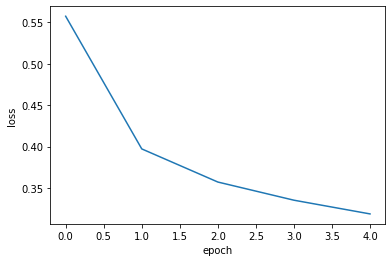

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

- 정확도 출력
  - 이번에는 정확도를 출력해본다.

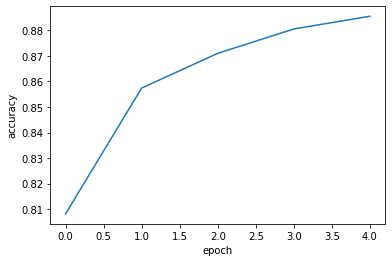

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

- 확실히 에포크마다 손실이 감소하고 정확도가 향상됨을 알 수 있다.
- 계속 손실이 감소하는지 확인해보자.
  - 에포크를 20으로 늘려서 모델을 훈련하고 손실을 그려본다.

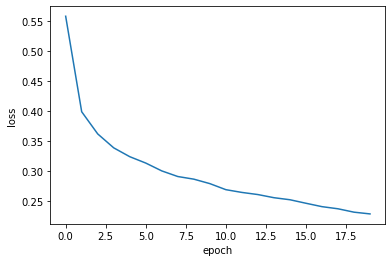

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0) # 수치 조정
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

- 예상대로 손실이 잘 감소한다.

- 검증손실
  - 다음과 같이 loss, accuracy, val_loss, val_accuracy 가 출력되도록 하는 것이 정석이다.
  - 에포크마다 검증 손실을 계산하기 위해 케라스 모델의 fit()메서드에 검증 데이터를 전달할 수 있다.

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=1, 
                    validation_data=(val_scaled, val_target))

Epoch 1/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5619 - accuracy: 0.8060 - val_loss: 0.4507 - val_accuracy: 0.8375
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3984 - accuracy: 0.8571 - val_loss: 0.3923 - val_accuracy: 0.8600
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3603 - accuracy: 0.8704 - val_loss: 0.3582 - val_accuracy: 0.8761
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3351 - accuracy: 0.8792 - val_loss: 0.3619 - val_accuracy: 0.8770
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3207 - accuracy: 0.8860 - val_loss: 0.3707 - val_accuracy: 0.8754
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3084 - accuracy: 0.8907 - val_loss: 0.3775 - val_accuracy: 0.8703
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2998 - accuracy: 0.8948 - val_loss: 0.3707 - val_accuracy:

- 과대 / 과소적합 문제를 조사하기 위해 훈련 손실과 검증 손실을 한 그래프에 그려서 비교해본다.

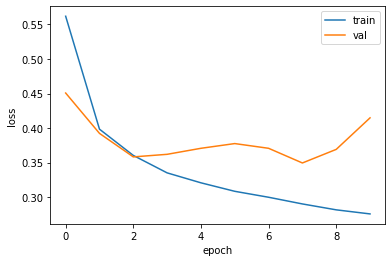

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- 검증 데이터 val이 갈수롤 손실이 증가한다.
- 더 나은 그래프를 위해 조정해본다.
- 위 내용에서 optimizer = adam을 추가

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5635 - accuracy: 0.8080 - val_loss: 0.5627 - val_accuracy: 0.7847
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4053 - accuracy: 0.8535 - val_loss: 0.3899 - val_accuracy: 0.8593
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3595 - accuracy: 0.8705 - val_loss: 0.3780 - val_accuracy: 0.8627
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3311 - accuracy: 0.8785 - val_loss: 0.3409 - val_accuracy: 0.8767
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3130 - accuracy: 0.8855 - val_loss: 0.3361 - val_accuracy: 0.8784
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2950 - accuracy: 0.8899 - val_loss: 0.3473 - val_accuracy: 0.8775
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2818 - accuracy: 0.8961 - val_loss: 0.3380 - val_accuracy:

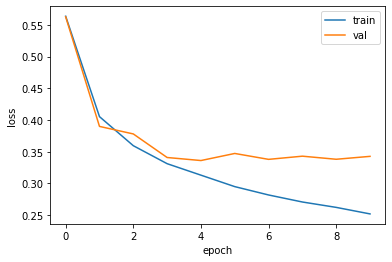

In [12]:
model = model_fn()
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics='accuracy') # adam 추가

history = model.fit(train_scaled, train_target, epochs=10, verbose=1, 
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- val의 손실이 성공적으로 줄어들었다.
- 구글링 : image classification django -> 개발자라면 공부해봐라
- 구글링 : image classification tensorflow

### 드롭아웃
- 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(뉴런의 출력을 0으로 만들어) 과대적합을 막는다.
- 기본적으로는 모든 파라미터를 연산하는 것이 원칙
  + 그런데, 일부 뉴런에서 출력이 없는 뉴런 발생
  + 기존 일부 뉴런은 계산에서 제외 시킴
- 인공신경망(뇌과학)
  + 값이 쏠림 현상 = 뇌에 피가 고인 현상
= 뇌출혈

- 앞서 정의한 model_fn() 함수에 드롭아웃 객체를 전달하여 층을 추가해본다.
- 여기에서 30% 정도를 드롭아웃한다.

In [13]:
model = model_fn(keras.layers.Dropout(0.3)) # 30% 드롭아웃
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
Total params: 88,600
Trainable params: 88,600
Non-trainable params: 0
_________________________________________________________________


- 결과. 은닉층 뒤에 추가된 드롭아웃 층(Dropout)은 훈련되는 모델 파라미터가 없다.
- 일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지는 않는다.
- 그래서 마음 편하게 검증 점수를 계산할 수 있다.
- 드롭아웃한 상태에서 이전과 마찬가지로 훈련 손실과 검증 손실의 그래프를 그려 비교해본다.

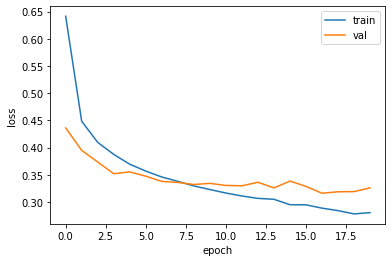

In [14]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics='accuracy') # adam 추가

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,   # 수치 조정
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- 과대적합이 확실히 줄었다.
- 다만, 20번의 에포크 동안 훈련했기에 결국 다소 과대적합이 되었다.
- 여기서 더 과대적합 하지 않게 하려면 에포크 횟수를 10으로 하고 다시 훈련하면 된다.

### 모델 저장과 복원
- 개발자 : 정확도는 중요하지 않음
  + 딥러닝 모델 활용해서 웹앱을 개발
- 분석가 & 머신러닝 엔지니어 : 캐글대회(정확도 검증 필수)

- 에포크 횟수를 10으로 하고 다시 훈련한다.
- 그리고 나중에 사용하려면 이 모델을 저장해야 한다.

In [15]:
model = model_fn(keras.layers.Dropout(0.3))                                                    # 30% 드롭아웃
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics='accuracy')  # adam 추가

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,   # 수치 조정
                    validation_data=(val_scaled, val_target))

- save_weights()
  - 훈련된 모델의 파라미터를 저장한다.
- save()
  - 모델 구조와 모델 파라미터를 함께 저장한다.

In [16]:
model.save_weights('model-weights.h5')
model.save('model-whole.h5')

- 두 가지 실험을 해본다.
  - 첫 번째는 훈련을 하지 않은 새로운 모델을 만들고 model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용한다.
  - 두 번째는 아예 model-whole.h5 파일에서 새로운 모델을 만들어 바로 사용한다.

- 첫 번째 실험
  - 모델 불러오기

In [17]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

- 406p
- 10개 확률 중에 가장 큰 값의 인덱스를 골라 타깃 레이블과 비교하여 정확도를 계산해 본다.

In [18]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

0.8840833333333333


- 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도를 출력해 본다.
- load_model()을 이용하여 파일을 읽으면 된다.

In [19]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3263 - accuracy: 0.8841


[0.326292484998703, 0.8840833306312561]

- 같은 모델을 저장하고 다시 불렀기에 이전 코드와 동일한 정확오를 얻었다.

### 콜백
- 408p
- 지금까지 20번의 에포크 동안 모델을 훈련하여 검증 점수가 상승하는 지점을 확인했다.
- 이전처럼 모델을 두 번씩 훈련하지 않고 한 번에 끝내기 위해 콜백을 사용할 수 있다.
- 콜백 = 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체이다.

In [20]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', 
                                                save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0, 
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

- model_fn()함수로 모델을 만들고 compile()을 호출한다.
- 모델이 훈련한 후에 best-model.h5에 최상의 검증 점수를 낸 모델이 저장된다.
- 이 모델을 load_model()함수로 다시 읽어서 예측을 수행한다.

In [21]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3197 - accuracy: 0.8858


[0.31966158747673035, 0.8858333230018616]

- EarlyStopping
  + 조기 종료
  + 에포크를 많이 주면 줄수록 성능(가중치 업데이트 / 기울기가 계속 미분)이 좋아야 하는 것이 원리
  + 에포크 100 / 50 에포크 시점과 90 에포크 시점 성능 차이 없음
  + 즉, 계속 진행해도 좋아질지 안 좋아질지 모르기에 조기 종료하는 것.

- EarlyStopping 콜백을 ModelCheckpoint 콜백과 함께 사용하면 가장 낮은 검증 손실의 모델을 파일에 저장한다.
- 그리고 검증 손실이 다시 상승할 때 훈련을 중지할 수 있다.
- 훈련을 중지한 다음 현재 모델의 파라미터를 최상의 파라미터로 되돌린다.
- 두 콜백을 함께 사용해보자.

In [22]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,                 # patience는 몇 개의 콜백을 리스트로 전달할지 결정한다.
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

- 몇 번째 훈련에서 중지되는지 다음 코드로 확인할 수 있다.

In [23]:
print(early_stopping_cb.stopped_epoch)

10


- epoch 값이 10에 다다랐을 때, '조기종료'한다.

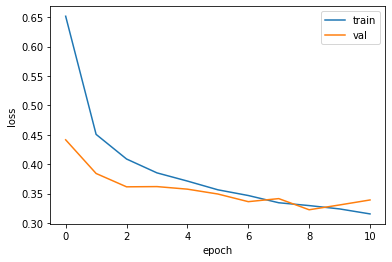

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show() 

- 이런 식으로 조기 종료 기법을 사용하면 안심하고 에포크 횟수를 크게 지정해도 괜찮다.

- Reference : 혼자 공부하는 머신러닝 + 딥러닝